In [1]:
# import the libraries :
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from scipy import stats

In [2]:
data=pd.read_csv("Engg_College_Data.csv")

In [3]:
data.head()

,SR_NO,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure
0,1,A,5,2,5,5,3
1,2,B,4,2,5,5,3
2,3,C,4,5,5,4,5
3,4,D,5,4,5,4,4
4,5,E,2,5,2,2,5


In [5]:
data.isnull().sum()

SR_NO             0
Engg_College      0
Teaching          0
Fees              0
Placements        0
Internship        0
Infrastructure    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   SR_NO           26 non-null     int64 
 1   Engg_College    26 non-null     object
 2   Teaching        26 non-null     int64 
 3   Fees            26 non-null     int64 
 4   Placements      26 non-null     int64 
 5   Internship      26 non-null     int64 
 6   Infrastructure  26 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.6+ KB


In [7]:
df=data.copy()

In [10]:
x=data.drop(['SR_NO','Engg_College'],axis=1)

In [11]:
x.head()

,Teaching,Fees,Placements,Internship,Infrastructure
0,5,2,5,5,3
1,4,2,5,5,3
2,4,5,5,4,5
3,5,4,5,4,4
4,2,5,2,2,5


In [8]:
import scipy.cluster.hierarchy as sch

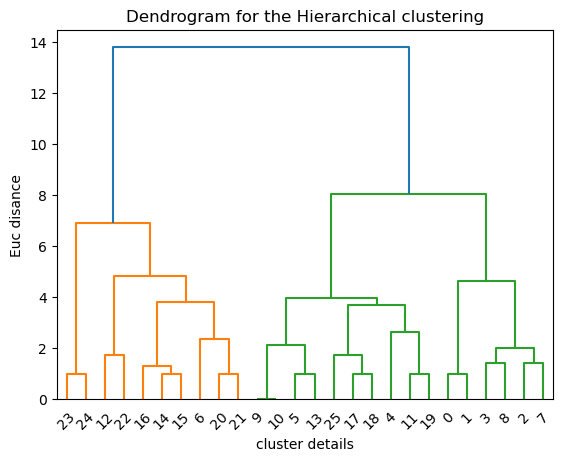

In [12]:
dendrogram=sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('Dendrogram for the Hierarchical clustering')
plt.xlabel('cluster details')
plt.ylabel('Euc disance')
plt.show()

In [13]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=4,metric='euclidean',linkage='ward')


In [17]:
y_pred_hc=hc.fit_predict(x)

In [18]:
y_pred_hc

array([1, 1, 1, 1, 2, 2, 0, 1, 1, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0,
       0, 3, 3, 2], dtype=int64)

In [19]:
x['Hierarchical cluster_type']=y_pred_hc

In [20]:
x.head()

,Teaching,Fees,Placements,Internship,Infrastructure,Hierarchical cluster_type
0,5,2,5,5,3,1
1,4,2,5,5,3,1
2,4,5,5,4,5,1
3,5,4,5,4,4,1
4,2,5,2,2,5,2


In [21]:
# by Kmeans clustering

In [22]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(2,10):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_) 

In [23]:
print(wcss)

[138.6875, 100.3125, 64.19166666666666, 52.133333333333326, 41.46666666666667, 30.866666666666664, 23.96666666666667, 19.75]


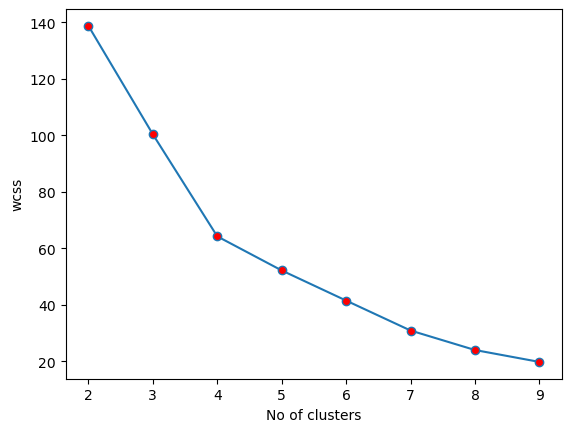

In [24]:
# to plot the graph of k values vs wcss ie elbow curve
list=[i for i in range(2,10)]
plt.figure()
plt.plot(list,wcss,marker='o',mfc='red')
plt.xlabel('No of clusters')
plt.ylabel('wcss')
plt.show()

In [27]:
kmeans=KMeans(n_clusters=4)
y_pred_clusters=kmeans.fit_predict(x)

In [36]:
y_pred_clusters

array([1, 1, 1, 1, 2, 2, 0, 1, 1, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0,
       0, 3, 3, 2])

In [37]:
data['cluster Label']=y_pred_clusters

In [38]:
data

,SR_NO,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure,cluster Label
0,1,A,5,2,5,5,3,1
1,2,B,4,2,5,5,3,1
2,3,C,4,5,5,4,5,1
3,4,D,5,4,5,4,4,1
4,5,E,2,5,2,2,5,2
5,6,F,3,4,3,3,4,2
6,7,G,1,3,1,1,2,0
7,8,H,4,4,5,5,5,1
8,9,I,4,4,4,4,4,1
9,10,J,3,4,3,4,5,2


In [35]:
x['cluster Label']=y_pred_clusters

In [32]:
x

,Teaching,Fees,Placements,Internship,Infrastructure,Hierarchical cluster_type,cluster Label
0,5,2,5,5,3,1,1
1,4,2,5,5,3,1,1
2,4,5,5,4,5,1,1
3,5,4,5,4,4,1,1
4,2,5,2,2,5,2,2
5,3,4,3,3,4,2,2
6,1,3,1,1,2,0,0
7,4,4,5,5,5,1,1
8,4,4,4,4,4,1,1
9,3,4,3,4,5,2,2


In [40]:
data.drop(['SR_NO','Engg_College'],axis=1)

,Teaching,Fees,Placements,Internship,Infrastructure,cluster Label
0,5,2,5,5,3,1
1,4,2,5,5,3,1
2,4,5,5,4,5,1
3,5,4,5,4,4,1
4,2,5,2,2,5,2
5,3,4,3,3,4,2
6,1,3,1,1,2,0
7,4,4,5,5,5,1
8,4,4,4,4,4,1
9,3,4,3,4,5,2
